In [ ]:
#import tensorflow
#print(tensorflow.__version__)

In [4]:
%cd /content/drive/MyDrive/ML Project


/content/drive/.shortcut-targets-by-id/1OGBxv0w8wrNxcfysVAcQP9R25afxB_kT/ML Project


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle

cp: cannot stat '/content/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip gtsrb-german-traffic-sign.zip -d .

unzip:  cannot find or open gtsrb-german-traffic-sign.zip, gtsrb-german-traffic-sign.zip.zip or gtsrb-german-traffic-sign.zip.ZIP.


In [ ]:
# define some variables for later usage
epochs = 10
img_size = 150
batch_size = 32

In [1]:
data_dir = "/content/drive/MyDrive/ML Project/Pneumonia"
TEST = '/content/drive/MyDrive/ML Project/Pneumonia/test/'
TRAIN = '/content/drive/MyDrive/ML Project/Pneumonia/train/'
VAL ='/content/drive/MyDrive/ML Project/Pneumonia/valid/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2, 
                                   vertical_flip = True)

# load a mini batch of images directly from the source folder then convert them into a vector of attributes
training_set = train_datagen.flow_from_directory(directory = data_dir + '/train',
                                                 batch_size = 8,
                                                 target_size = (150, 150),
                                                 shuffle = True,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
training_set.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(directory = data_dir + '/test',
                                            batch_size = 8,
                                            target_size = (150, 150),
                                            shuffle = True,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:
# import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from mlxtend.plotting import plot_confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.layers import Dense, Conv2D, Dropout, Flatten, Activation
from keras.layers import SeparableConv2D, MaxPool2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model = Sequential()

# 1st conv
# 1st conv
model.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape = (150, 150, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(32,  activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
# fit the data to the cnn model
cnn = model.fit_generator(training_set,
                          epochs =5,
                          steps_per_epoch = training_set.samples // 8,
                          validation_data = test_set,
                          validation_steps = test_set.samples // 8,
                          )        

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
652/652 [==============================] - ETA: 0s - loss: 0.4404 - accuracy: 0.8280

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-3fb31745922a>", line 6, in <module>
    validation_steps = test_set.samples // 8,
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1861, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1117, in fit
    self._fit_frame = tf_inspect.currentframe()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/tf_inspect.py", line 95, in currentframe
    return _inspect.stack()[1][0]
  File "/usr/lib/python3.6/inspect.py", line 1501, in stack
    return getouterframes(sys._getframe(1), context)
  File "/usr/lib/python3.6/inspect.py", line 1478, in getouterframes
    frameinfo = (frame,) + getframeinfo(frame, contex

FileNotFoundError: ignored

In [ ]:
model.predict_classes(test_set[30][0])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

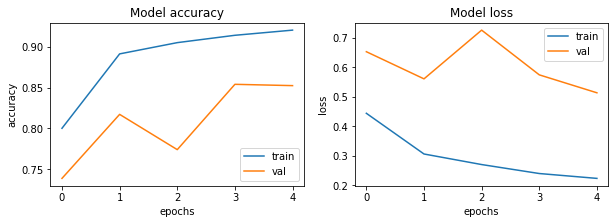

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(cnn.history[met])
    ax[i].plot(cnn.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
test_data = []
test_labels = []

for title in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(data_dir + '/test' + title)):
            img = plt.imread(data_dir + '/test' + title + img)
            img = cv2.resize(img, (img_size, img_size))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if title == '/NORMAL/':
                label = 0
            elif title == '/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
test_data = np.array(test_data)
test_labels = np.array(test_labels)
# get predictions
preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
# get the confusion matrix
mat = confusion_matrix(test_labels, np.round(preds))

Text(0.5, 1.0, 'Confusion Matrix')

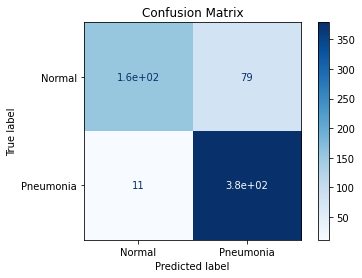

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(mat, display_labels=['Normal', 'Pneumonia'])
cmd.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix')

In [ ]:
# calculate precision and recall
tn, fp, fn, tp = mat.ravel()
print('Test Metrics:')
precision = tp / (tp + fp) * 100
recall = tp / (tp + fn) * 100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

Test Metrics:
Accuracy: 85.57692307692307%
Precision: 82.75109170305677%
Recall: 97.17948717948718%
F1-score: 89.38679245283019


In [ ]:
print('Train Metric:')
print('Train accuracy: {}%'.format(np.round(cnn.history['accuracy'][-1]*100, 2)))

Train Metric:
Train accuracy: 92.06%
